In [1]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix

from preprocess import extra_features, separate
from pipelines import preprocessor, preprocessor2

In [2]:
train=pd.read_csv('Datasets/train.csv')
train=extra_features(train)
separate(train)

<IPython.core.display.Javascript object>

Target Column: ['cost_category']

Numerical Columns: ['night_mainland', 'night_zanzibar', 'total_nights']

Categorical Columns: ['age_group', 'travel_with', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz', 'trip_length', 'group_size']

Text Columns: ['country', 'purpose', 'main_activity', 'info_source']


In [3]:
train.drop(columns= ['trip_length', 'group_size','total_male', 'total_female'], inplace=True)
X=train.drop('cost_category', axis=1)
X.head(2)

,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_nights,total_people
Tour_ID,,,,,,,,,,,,,,,,,,,
tour_id1hffseyw,ITALY,45-64,With Children,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,7,2.0
tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,7,2.0


In [4]:
X.shape

(18506, 19)

In [5]:
X=preprocessor2(X)
X.shape

(18506, 35)

In [6]:
y= train['cost_category']
y.shape

(18506,)

In [7]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 1, 1, 3])

In [8]:
list(le.classes_)

['High Cost',
 'Higher Cost',
 'Highest Cost',
 'Low Cost',
 'Lower Cost',
 'Normal Cost']

In [9]:
z=le.inverse_transform(y)
z

array(['High Cost', 'High Cost', 'Higher Cost', ..., 'Higher Cost',
       'Higher Cost', 'Low Cost'], dtype=object)

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from xgboost import XGBClassifier

model= XGBClassifier(n_estimators=600,
                 max_depth=8,
                 learning_rate=0.01)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [21]:
y_pred=model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.39      0.40       763
           1       0.58      0.63      0.60       955
           2       0.32      0.13      0.19        89
           3       0.25      0.22      0.23       294
           4       0.53      0.51      0.52       489
           5       0.52      0.56      0.54      1112

    accuracy                           0.50      3702
   macro avg       0.44      0.41      0.41      3702
weighted avg       0.49      0.50      0.49      3702



In [23]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[295, 237,   2,  13,  16, 200],
       [199, 600,  18,   4,   7, 127],
       [ 19,  52,  12,   1,   0,   5],
       [ 15,  13,   1,  64,  88, 113],
       [ 17,  21,   0,  72, 248, 131],
       [152, 115,   4, 104, 112, 625]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

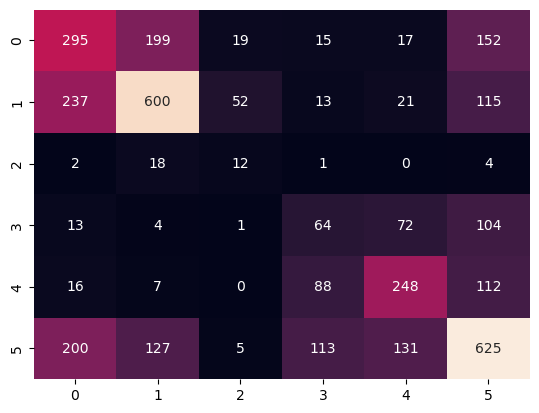

In [24]:
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.show();

In [25]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

In [26]:
for fold, (train_idx, val_idx) in enumerate(kfold.split(X,y)):
    X_train, X_test= X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]

In [27]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [28]:
y_pred=model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

   High Cost       0.45      0.44      0.44       367
 Higher Cost       0.64      0.65      0.65       487
Highest Cost       0.06      0.03      0.04        36
    Low Cost       0.25      0.21      0.22       156
  Lower Cost       0.53      0.49      0.51       257
 Normal Cost       0.54      0.60      0.57       547

    accuracy                           0.52      1850
   macro avg       0.41      0.40      0.40      1850
weighted avg       0.51      0.52      0.52      1850



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

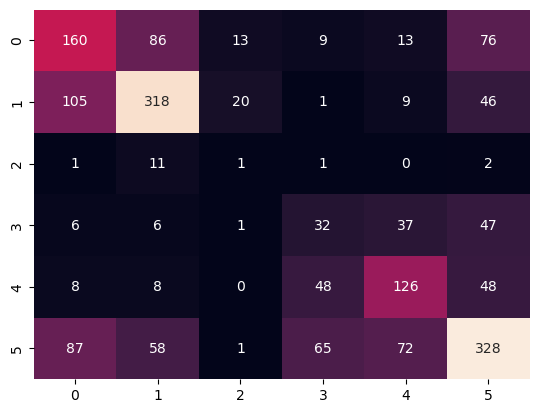

In [29]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.show();